In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sea
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error

In [2]:
data = pd.read_csv("C:\\Users\\Bubrick\\Desktop\\malyutin\\hw\\task3\\train.csv")
data.sample(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
1991,2011-05-09 21:00:00,2,0,1,1,21.32,25.000,59,8.9981,28,128,156
2146,2011-05-16 08:00:00,2,0,1,1,22.96,26.515,73,19.9995,28,366,394


In [3]:
data['year'] = pd.DatetimeIndex(data['datetime']).year
data['month'] = pd.DatetimeIndex(data['datetime']).month
data['day'] = pd.DatetimeIndex(data['datetime']).day
data['hour'] = pd.DatetimeIndex(data['datetime']).hour
data = data.drop(columns=['datetime'])
data.sample(2)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
2465,2,0,1,1,34.44,37.880,44,7.0015,49,163,212,2011,6,10,15
1219,1,0,1,2,15.58,19.695,46,19.9995,14,74,88,2011,3,15,14


In [4]:
data["season"] = data["season"].astype('category')
data["holiday"] = data["holiday"].astype('category')
data["workingday"] = data["workingday"].astype('category')
data["weather"] = data["weather"].astype('category')
data["year"] = data["year"].astype('category')    #не уверен на счет года, ну, попробуем)
data["month"] = data["month"].astype('category')
data["day"] = data["day"].astype('category')
data["hour"] = data["hour"].astype('category')
data.dtypes

season        category
holiday       category
workingday    category
weather       category
temp           float64
atemp          float64
humidity         int64
windspeed      float64
casual           int64
registered       int64
count            int64
year          category
month         category
day           category
hour          category
dtype: object

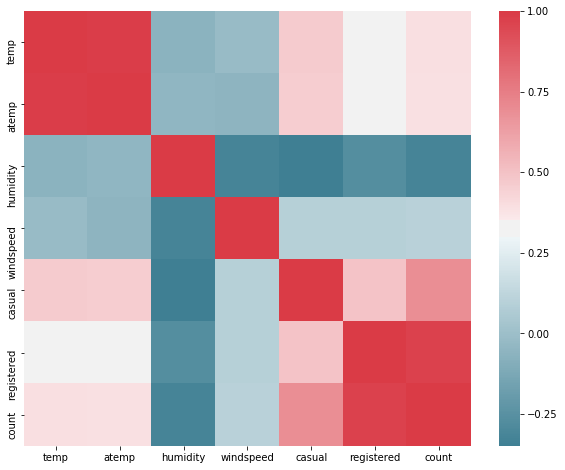

In [5]:
f, ax = plt.subplots(figsize=(10, 8))
corr = data.corr()
sea.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sea.diverging_palette(220, 10, as_cmap=True))

In [6]:
data = data.drop(columns=['temp', 'registered', 'casual'])
data.dtypes

season        category
holiday       category
workingday    category
weather       category
atemp          float64
humidity         int64
windspeed      float64
count            int64
year          category
month         category
day           category
hour          category
dtype: object

D:\anaconda_python\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


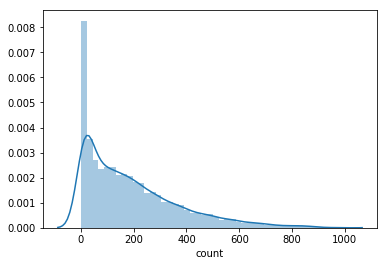

In [7]:
sea.distplot(data["count"])

let's try log

In [8]:
#tmp = np.log(data["count"].values)
#sea.distplot(tmp)

сойдет, оставим

In [9]:
#data["count"] = tmp

In [10]:
data_features = data.drop(columns=["count"])
data_result = data["count"]
ft_train, ft_test, res_train, res_test = train_test_split(data_features, data_result)

In [11]:
scaler = StandardScaler()
scaler.fit(data_features, data_result)
ft_train_scaled = scaler.transform(ft_train)
ft_test_scaled = scaler.transform(ft_test)

In [12]:
reg = SGDRegressor(tol=1e-4)
reg.fit(ft_train_scaled, res_train)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=None, n_iter=None, penalty='l2',
       power_t=0.25, random_state=None, shuffle=True, tol=0.0001,
       verbose=0, warm_start=False)

In [13]:
mean_squared_error(res_test, reg.predict(ft_test_scaled)), mean_squared_error(res_train, reg.predict(ft_train_scaled))

(20099.360071525392, 20076.191636384407)

In [14]:
data_features_2 = data_features.drop(columns=["season", "holiday", "workingday", "weather"])
data_result_2 = data_result.drop(columns=["season", "holiday", "workingday", "weather"])
ft_train_2, ft_test_2, res_train_2, res_test_2 = train_test_split(data_features_2, data_result_2)

In [15]:
scaler_2 = StandardScaler()
scaler_2.fit(data_features_2, data_result_2)
ft_train_scaled_2 = scaler_2.transform(ft_train_2)
ft_test_scaled_2 = scaler_2.transform(ft_test_2)

In [16]:
reg_2 = SGDRegressor(tol=1e-4)
reg_2.fit(ft_train_scaled_2, res_train_2)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=None, n_iter=None, penalty='l2',
       power_t=0.25, random_state=None, shuffle=True, tol=0.0001,
       verbose=0, warm_start=False)

In [17]:
mean_squared_error(res_test_2, reg_2.predict(ft_test_scaled_2)), mean_squared_error(res_train_2, reg_2.predict(ft_train_scaled_2))

(20022.191812444096, 20113.44856167295)

In [18]:
enc = OneHotEncoder(sparse=False, categorical_features=[0, 1, 2, 3, 7, 8, 9, 10])
data_features_transformed = enc.fit_transform(data_features)

In [19]:
ft_train_3, ft_test_3, res_train_3, res_test_3 = train_test_split(data_features_transformed, data_result)

In [20]:
scaler_3 = StandardScaler()
scaler_3.fit(ft_train_3, res_train_3)
ft_train_scaled_3 = scaler_3.transform(ft_train_3)
ft_test_scaled_3 = scaler_3.transform(ft_test_3)

In [21]:
reg_3 = SGDRegressor(tol=1e-3)
reg_3.fit(ft_train_scaled_3, res_train_3)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=None, n_iter=None, penalty='l2',
       power_t=0.25, random_state=None, shuffle=True, tol=0.001, verbose=0,
       warm_start=False)

In [22]:
mean_squared_error(res_test_3, reg_3.predict(ft_test_scaled_3)), mean_squared_error(res_train_3, reg_3.predict(ft_train_scaled_3))

(10729.42143016101, 10057.642965889107)